# Which video should be put on the Front Page?
## Model Generation based on the 40,949 trending videos in the US by Yixin (Amelia) Jin



Data Source (Kaggle): 

https://www.kaggle.com/datasnaek/youtube-new

https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv

https://www.kaggle.com/datasnaek/youtube-new#US_category_id.json

## 1. Introduction and Goal Clarification
YouTube is the most popular and most used video platfrom in the world today. YouTube has a list of trending videos that is updated constantly. Here we will use Python with some packages like `Pandas` and `Matplotlib` to analyze a dataset that was collected over 205 days. For each of those days, the dataset contains data about the trending videos of that day. It contains data about 40,949 trending videos in the US. In order to increase the YouTube's traffic, I will analyze this data to get insights into YouTube trending videos, to see what is common between these videos and finally deliver a machine learning model of deciding what videos should be put on the Front Page. 

### Goal
In order to increase the traffic for Youtube, I need to deliver a machine learning model for decision on whether the videos should be on the front page videos.



## 2. Data Preprocessing
### 2.1. Package & Datasets Import
First, I will read the dataset file which is in `csv` format and `JSON` format. 
Then, I need to gain the preliminary insights into the first five rows of the DataFrames.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'  # For clear Figure Output
import warnings
warnings.filterwarnings('ignore')  # Hiding warnings for cleaner display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import sklearn.datasets as datasets
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

In [6]:
USvideos=pd.read_csv('USvideos.csv')
US_category_id=pd.read_json('US_category_id.json')
print(f'Shape of the DataFrame of videos:{USvideos.shape}')
print('Head of the DataFrame of videos:')
print(USvideos.head())
print('Information of the DataFrame of videos:')
print(USvideos.info())
print(f'---------------------------------\nShape of the DataFrame of categories:{US_category_id.shape}')
print('Head of the DataFrame of categories:')
print(US_category_id.head())
print('Information of the DataFrame of categories:')
print(US_category_id.info())

Shape of the DataFrame of videos:(40949, 16)
Head of the DataFrame of videos:
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:4

#### Some Observations:
We can see that there are 40,949 entries in the `videos` dataset. Also, all columns in the dataset are complete (i.e. they have 40,949 non-null entries) except description column which has some null values; it only has 40,379 non-null values. In this case, due to the string format of the missing values, and here is not for NLP, I decide **not to drop the rows with missing values**.

### 2.2. Merging Datasets
Then, we can see that there are 32 entries in the `categories` dataset. The `items` column contains a dictionary, which requires further data wrangling.Also, according to the `id` column and the `category_id` column from the `videos` dataset, I can merge two datasets together for further analysis.

In [7]:
# Split the items column
US_category_id_unsplit = US_category_id.copy()
US_category_id_split = pd.concat([US_category_id_unsplit, US_category_id_unsplit['items'].apply(pd.Series)], axis = 1).drop('items', axis = 1)
US_category_id_split = pd.concat([US_category_id_split, US_category_id_split['snippet'].apply(pd.Series)], axis = 1).drop('snippet', axis = 1)
print('Information of the DataFrame of splitted categories:')
print(US_category_id_split.info())
US_category_id_split

Information of the DataFrame of splitted categories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
kind          32 non-null object
etag          32 non-null object
kind          32 non-null object
etag          32 non-null object
id            32 non-null object
channelId     32 non-null object
title         32 non-null object
assignable    32 non-null bool
dtypes: bool(1), object(7)
memory usage: 1.9+ KB
None


,kind,etag,kind,etag,id,channelId,title,assignable
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [8]:
# Merge two datasets
US_category_id_split['id'] = pd.to_numeric(US_category_id_split['id'])
video_combined = pd.merge(USvideos, US_category_id_split, left_on = 'category_id', right_on = 'id').drop('id',axis=1)

# Cleaning the columns with the same name
video_combined.rename(columns={'title_x':'title'}, inplace=True)
video_combined.rename(columns={'title_y':'category'}, inplace=True)

print(video_combined.info())
video_combined

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 23 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
kind                      40949 non-null object
etag                      40949 non-null object
kind                      40949 non-nu

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,kind,etag,kind,etag,channelId,category,assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,...,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,...,False,False,I found this online dollar store called ShopMi...,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,...,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,...,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,...,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""

### 2.3. Data Cleaning
Some columns with qualitative information can be converted into quantitative information. I will conduct two types of conversion:
1. Retrieve the number of tags from the `tags` coulmn
2. Retrieve the datetime information from the `trending_time` and the `publish_time` columns, and the time from publishion to be listed as the trending videos.
3. Retrieve the word number of title from the `title` column.


In [9]:
# Add a column to record the number of tags by each video
def tags_count(tags_string):
    possible_tags = []
    tags = tags_string.replace('"', '').lower().split('|')
    for tag in tags:
        if tag not in possible_tags:
            possible_tags.append(tag)
    return len(possible_tags)
video_combined['tags_count'] = video_combined['tags'].apply(tags_count)

In [10]:
# Converting two time columns to datetime series
video_combined['trending_date'] = pd.to_datetime(video_combined['trending_date'], format='%y.%d.%m')
video_combined['publish_time'] = pd.to_datetime(video_combined['publish_time'], format='%Y-%m-%d')

# Adding a time to trending_date in order to compare with publish_time
# Input last minute of day in order to avoid negative differences
video_combined['trending_date'] = pd.to_datetime(video_combined['trending_date'].astype(str) + ' ' + pd.Series(['23:59:59+00:00']*video_combined.shape[0]),
                                            format='%Y-%m-%d %H:%M:%S')

# Create new feature trending_time in seconds
video_combined['trending_time_seconds'] = pd.to_timedelta(video_combined['trending_date'] - video_combined['publish_time']).apply(lambda x: int(x.total_seconds()))

# Assert there's no negative time
try:
    if (video_combined['trending_time_seconds'] < 0).any():
        raise ValueError
except ValueError:
    print("Negative timedelta found ! You should have a look.")

In [11]:
# Retrieve the published hours by each day
video_combined['publish_hour']=video_combined['publish_time'].dt.hour

# Retrieve the published day by week
video_combined['publish_weekday'] = video_combined['publish_time'].dt.weekday_name
video_combined['publish_weekday_num'] = video_combined['publish_weekday'].replace({'Monday':1,
                                                                                   'Tuesday':2,
                                                                                   'Wednesday':3,
                                                                                   'Thursday':4,
                                                                                   'Friday':5,
                                                                                   'Saturday':6,
                                                                                   'Sunday':7})

In [12]:
# Retrieve the word number of the title
video_combined['title_length'] = video_combined['title'].str.len()

## 3. Exploratory Data Analysis

After quality data conversion, the columns of **quantity information** can be categorized into three groups. One is the **Content** group,comprised of the  column of `tags_count`. The second group is the **Interaction** group, including the columns of `views`, `likes`, `dislikes`, and `comment_count`. The third group is the **Time** group, including the columns of `trending_time_seconds`and `publish_weekday_num`.

As for the columns of **quality information**, the columns of `category` and `publish_weekday` can be retrieved for in-depth analysis.

In [13]:
# Deliver New DataFrame of the quality and quantity information
video_quan = ['title_length', 'tags_count', 'views', 'likes', 'dislikes','comment_count','trending_time_seconds', 'publish_weekday_num']
video = video_combined[['video_id', 'title_length', 'tags_count', 'views', 'likes', 'dislikes','comment_count','trending_time_seconds', 'publish_weekday_num', 'category', 'publish_weekday']]

### 3.1. Correlation Analysis
Deliver the correlation matrix based on the columns of quantitative information.

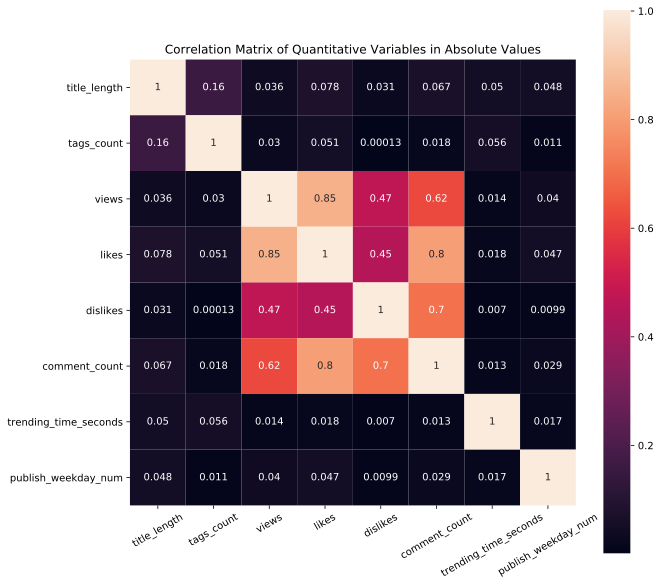

In [14]:
corr = video[video_quan].corr().abs()

# Plot correlation with selected quantitative columns
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix of Quantitative Variables in Absolute Values')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.savefig('Correlation_Matrix.png')

#### Some Observations:
The variables within the **Interaction** group are highly correlated. Therefore, this group of variables can be the reliable indicators for the front page videos.

### 3.2. Category Analysis
Deliver the correlation matrix based on the columns of quantitative information.

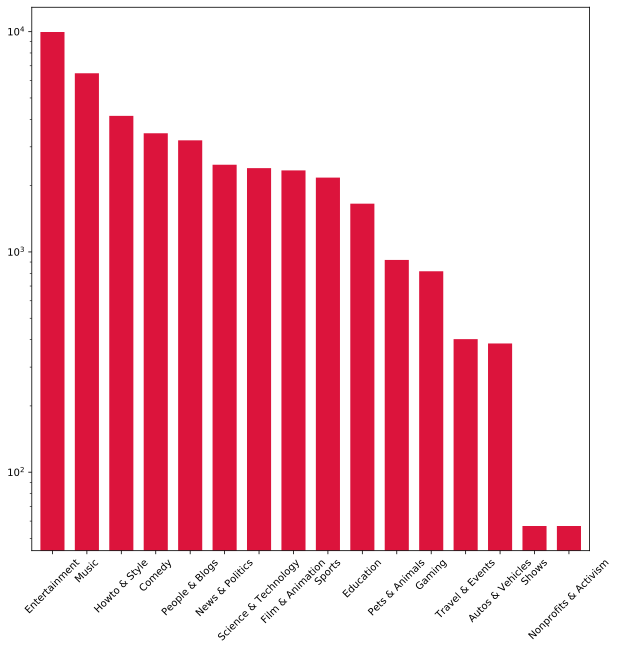

In [15]:
# Get the videos distribution by different categories
category_distribution = video.category.value_counts()

# Use Bar Chart to present the category distribution
plt.figure(figsize=(10,10))
category_distribution.plot(kind='bar',  color='crimson', width = 0.7)
plt.xticks(rotation=45)
plt.yscale("log")
plt.savefig('category distribution.png')

#### Some Observations:
There're 16 types of these trending videos. The most common one is the `Entertainment`. There can be some category differences among the 40,000+ videos.

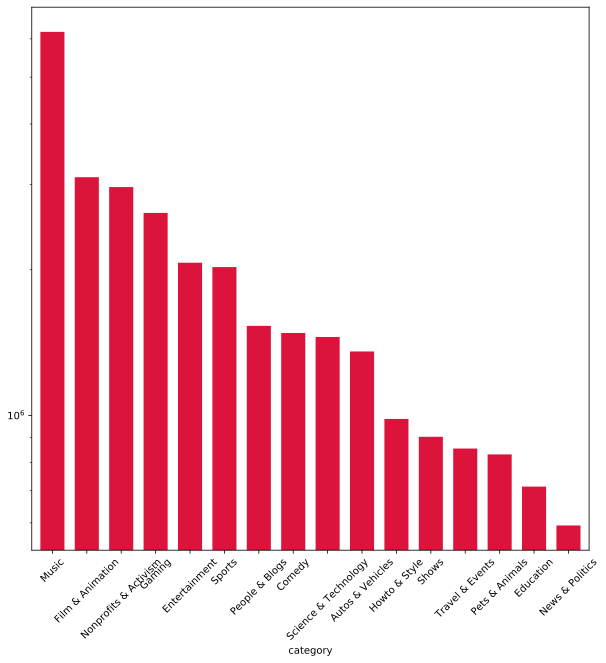

In [16]:
# Get the view distribution by different categories using the mean of the views
category_distribution_views = video.groupby('category').views.mean().sort_values(ascending=False)

# Use Bar Chart to present the views distribution by category
plt.figure(figsize=(10,10))
category_distribution_views.plot(kind='bar',  color='crimson', width = 0.7)
plt.xticks(rotation=45)
plt.yscale("log")

#### Some Observations:
The type of `Music` is not only common, but also beinng most watched.

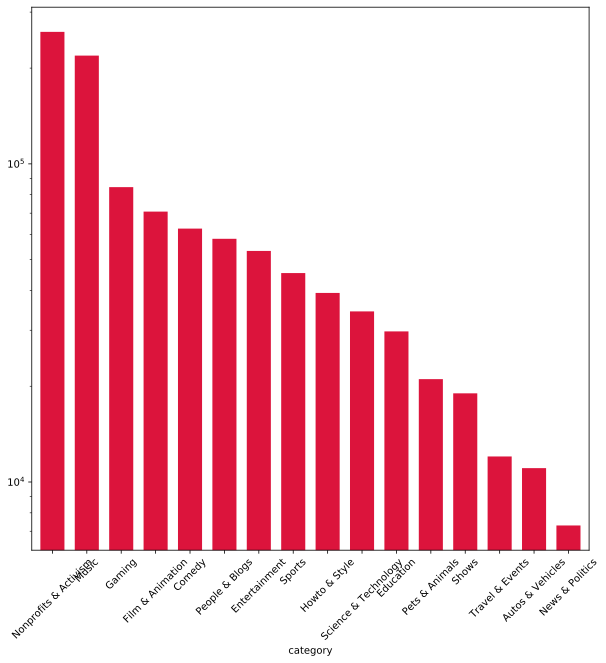

In [17]:
# Get the like distribution by different categories using the mean of the likes
category_distribution_likes = video.groupby('category').likes.mean().sort_values(ascending=False)

# Use Bar Chart to present the likes distribution by category
plt.figure(figsize=(10,10))
category_distribution_likes.plot(kind='bar',  color='crimson', width = 0.7)
plt.xticks(rotation=45)
plt.yscale("log")

#### Some Observations:
However,`Entertainment`is no longer the most being liked one. Instead, `Nonprofits & Activism` is the most liked one, but it's also the least common type. And I also find out that the `Music` type is not only common, but also being liked very much.

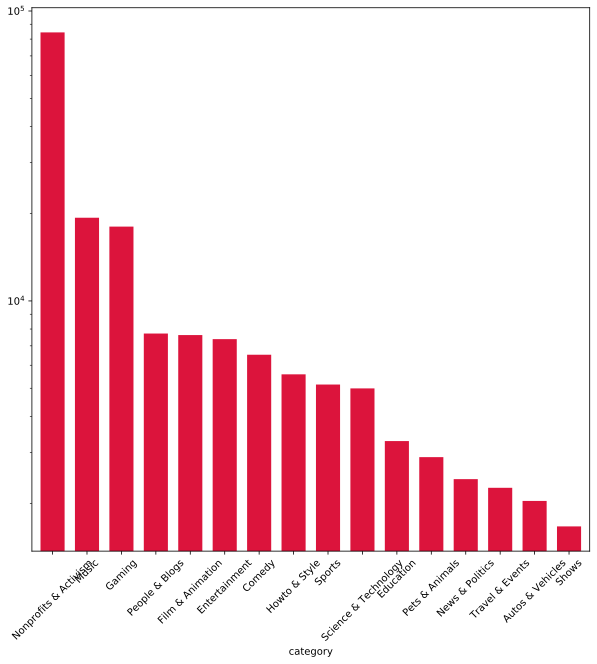

In [18]:
# Get the comment distribution by different categories using the mean of the comments
category_distribution_comment = video.groupby('category').comment_count.mean().sort_values(ascending=False)

# Use Bar Chart to present the comments distribution by category
plt.figure(figsize=(10,10))
category_distribution_comment.plot(kind='bar',  color='crimson', width = 0.7)
plt.xticks(rotation=45)
plt.yscale("log")

#### Some Observations:
It's intersting to find out that the like distribution and the comment distribution are very similar, where the type `Nonprofits & Activism` is the most being commented one. However, this type of videos is not commonly seen as others.

#### Conclusion:
Such category analysis has vividly showcased the necessity of taking category differences into consideration. Therefore, I will convert the `category` variable into dummy variable for further analysis. In this way, this qualitative column can be converted into quantitative information.

In [19]:
# Convert the category column into dummy variable
video = pd.get_dummies(video, prefix='Category', prefix_sep='_', columns=['category'])

print(video.columns)
# the number of columns has increase

Index(['video_id', 'title_length', 'tags_count', 'views', 'likes', 'dislikes',
       'comment_count', 'trending_time_seconds', 'publish_weekday_num',
       'publish_weekday', 'Category_Autos & Vehicles', 'Category_Comedy',
       'Category_Education', 'Category_Entertainment',
       'Category_Film & Animation', 'Category_Gaming',
       'Category_Howto & Style', 'Category_Music', 'Category_News & Politics',
       'Category_Nonprofits & Activism', 'Category_People & Blogs',
       'Category_Pets & Animals', 'Category_Science & Technology',
       'Category_Shows', 'Category_Sports', 'Category_Travel & Events'],
      dtype='object')


### 3.3. Time Analysis

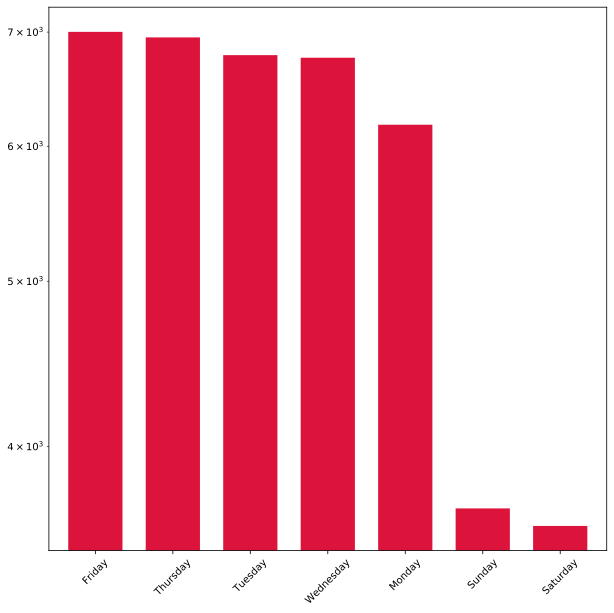

In [20]:
# Use Bar Chart to present the comments distribution by category
plt.figure(figsize=(10,10))
video.publish_weekday.value_counts().plot(kind='bar',  color='crimson', width = 0.7)
plt.xticks(rotation=45)
plt.yscale("log")

#### Some Observations:
Most of the trending videos were published during the weekdays rather than on weekends.Therefore, the differences among the seven days within a week should be taken into consideration.


### 3.4. Conclusion
Three groups of quantitative variables, including **Content**, **Interaction**, **Time**, can offer us the overall insights of these trending videos.More specific, the variables offering quantity information are listed as followed.

| Groups |   Variables (Column name)  | Description |
|-------|---------|---------|
| **Content**     | `title_length`    | Word number of the title |
|   |   `tags_count`   | Tag number |
|      | 16 variables with `Category_` prefixed     | Dummy variables of categories |
| **Interaction**     | `views`    | View number |
|   |   `likes`   | Like number |
|     | `dislikes`   | Dislike number |
|    |  `comment_count`    | Comment number |
| **Time**     | `trending_time_seconds`   | Lasting seconds from publishing to being trending |
|   |  `publish_weekday_num`    | Day within a week in numeric format |


## 4. Machine Learning Model for Like Levels Prediction
### 4.1. Prediction Variable

First, I need to convert this data into having a binary prediction variable, based on the **Interaction** metrics.According to the previous correlation matrix, it's obvious that the `like` variable is of relatively lighter colors than other variables. Therefore, I decide to use `like` variable as the prediction variable.For simplicity's sake we will treat the median as the dividing line for these labels, dividing the videos into **two** groups the `higher_likes` group and the `lower_like` group.The videos in the `higher_likes` group can be categorized as the videos on the front page.

In [21]:
# Retrieve the median of like number
video["likes"].describe()

count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64

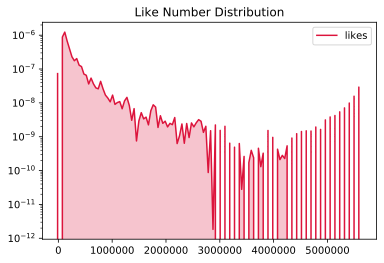

In [22]:
# Use plot to visualize the distribution of Like number
sns.kdeplot(video["likes"], shade=True, color='crimson')
plt.yscale("log")
plt.title('Like Number Distribution')
plt.savefig('like number distribution')

In [23]:
video['higher_likes'] = video["likes"] >= 18091

### 4.2. Creating the Train/Test Split

In [24]:
y_likes=video['higher_likes']
X_likes=video.drop(['video_id','publish_weekday','likes','higher_likes'],axis=1,inplace=False)
X_likes_train,X_likes_test,y_likes_train,y_likes_test=train_test_split(X_likes,y_likes, test_size=0.2, random_state=111)

### 4.3. Classifier Comparison
Conduct Machine Learning Model Comparison between **Decision Tree** and **Logistic Regression Model**, based on accuracy, kappa, precision and recall.

In [25]:
# Define a function that takes in the predictions of a classifier, the true labels,
# and a set of metrics and displays the model's performance on the metrics
def common_evaluations(y_pred, y_actual, metrics, model_name = 'model'):
    # Compute Metrics
    conf_matrix = confusion_matrix(y_actual, y_pred)
    model_results = {}
    for (metric_name, metric) in metrics.items():
        result = metric(y_actual, y_pred)
        model_results[metric_name] = result

    # Display Metrics
    print(f"Results for {model_name}:")
    ConfusionMatrixDisplay(conf_matrix, ["likes at lower level", "likes at higher level"]).plot(values_format='.4g')
    plt.title(f'Confusion Metrics for {model_name}')
    plt.savefig(f'evaluation_for_{model_name}.png')
    print(model_results)
    print("------------------------")

    return model_results

In [29]:
# Set a list of classifiers we want to compare
classifiers = {
    "Decision Tree"      : DecisionTreeClassifier(criterion="entropy", random_state=111),
    #"Logistic Regression": LogisticRegression(penalty="none", solver="lbfgs", random_state=111)
}

# Set a list of metrics we want to use to compare our classifiers 
metrics = {
    "Accuracy" : lambda y,y_pred: 100*accuracy_score(y,y_pred),
    "Kappa"    : cohen_kappa_score,
    "Precision": precision_score,
    "Recall"   : recall_score
}

# Choose a metric to optimize over
metric_to_optimize = 'Accuracy'

# Create variables to keep track of our best model and the metrics for each model
best_model_metric = 0
best_model_name = None

all_model_metrics = {metric: [] for metric in metrics}

Results for Decision Tree:
{'Accuracy': 95.2991452991453, 'Kappa': 0.905985574645304, 'Precision': 0.9477140077821011, 'Recall': 0.958200147528891}
------------------------
Best classifier is: Decision Tree 
With: 95.3% accuracy.


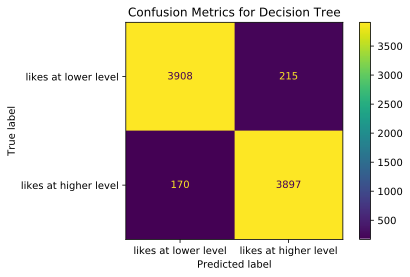

In [30]:
# For each model in our set of classifiers
for classifier_name, classifier in classifiers.items():

    # Train the classifier and get its predictions on the test set
    model = classifier.fit(X_likes_train, y_likes_train)
    y_pred = model.predict(X_likes_test)

    # Evaluate our metrics on the data 
    model_results = common_evaluations(y_pred, y_likes_test, metrics, classifier_name)
    
    # Update our best model if this model is better than our previous best
    comparison_metric = model_results[metric_to_optimize]
    if comparison_metric > best_model_metric:
        best_model_metric = comparison_metric
        best_model_name = classifier_name

    # Store the metrics for this model
    for metric in model_results:
        all_model_metrics[metric].append(model_results[metric]) 
    
print(f"Best classifier is: {best_model_name} \nWith: {best_model_metric:.1f}% accuracy.")   

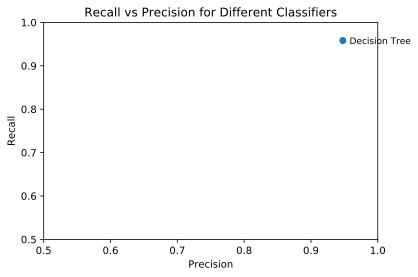

In [31]:
# Use plot to visualize difference between models
plt.xlim(0.5,1)
plt.xlabel("Precision")
plt.ylim(0.5,1)
plt.ylabel("Recall")
plt.title("Recall vs Precision for Different Classifiers")

# Plot data
names = list(classifiers.keys())
for i in range(len(classifiers)):
    x = all_model_metrics['Precision'][i]
    y = all_model_metrics['Recall'][i]
    plt.scatter(x, y)
    plt.text(x+0.01, y-0.008, names[i], fontsize=9)
    plt.savefig('Comparison.png')

### 4.4. Conclusion
According to the previous evaluation metrics and three plots, Decision Tree model can work better than Logistic Regression. Therefore, I will recommend using **Decision Tree** to predict whether the like number of a video can be at higher level, and thus deliver the conclusion on whether the video can be put on the front page.

In [34]:
y_likes

0         True
1        False
2        False
3        False
4         True
         ...  
40944     True
40945     True
40946     True
40947     True
40948     True
Name: higher_likes, Length: 40949, dtype: bool

In [36]:
dot_data = export_graphviz(model, out_file=None,
                                feature_names=X_likes.columns, # 特征名称
                                class_names=['True', 'False'], # 目标变量的类别名
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('example.gv', directory='E:\\log_reg', view=True)
print('Save example.gv file!\n')

NameError: name 'graphviz' is not defined

In [37]:
dot_data = StringIO()
export_graphviz(model, 
 out_file=dot_data, 
 class_names=['True', 'False'], # the target names.
 feature_names=X_likes.columns, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

InvocationException: GraphViz's executables not found